In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
start = '2010-01-01'
end = '2025-01-01'
stock = 'GOOG'

data = yf.download(stock,start,end)

[*********************100%***********************]  1 of 1 completed


In [4]:
data.reset_index(inplace=True)

In [5]:
data

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG,GOOG
0,2010-01-04,15.554351,15.610239,15.678981,15.547723,15.615220,78541293
1,2010-01-05,15.485855,15.541497,15.637387,15.480475,15.620949,120638494
2,2010-01-06,15.095475,15.149715,15.588072,15.102393,15.588072,159744526
3,2010-01-07,14.744061,14.797037,15.193053,14.760922,15.178109,257533695
4,2010-01-08,14.940615,14.994298,15.024933,14.672753,14.744733,189680313
...,...,...,...,...,...,...,...
3769,2024-12-24,197.570007,197.570007,197.669998,195.197998,196.169998,6809800
3770,2024-12-26,197.100006,197.100006,198.160004,195.869995,196.740005,7907900
3771,2024-12-27,194.039993,194.039993,196.800003,191.972000,196.470001,14693000


In [6]:
ma_100_days = data.Close.rolling(100).mean()

<function matplotlib.pyplot.show(close=None, block=None)>

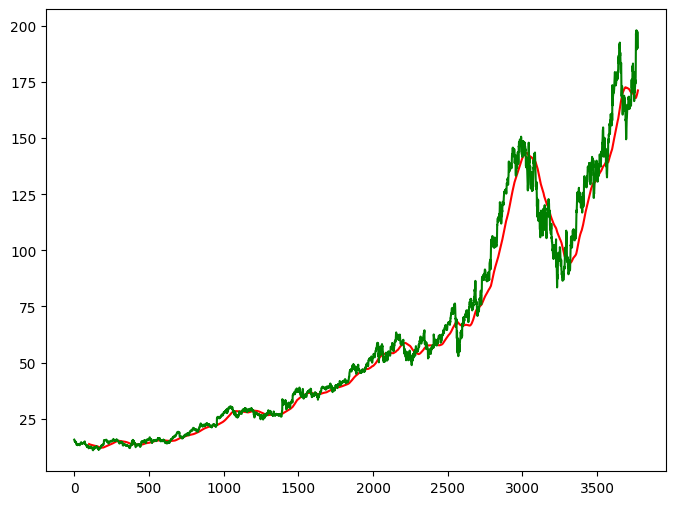

In [8]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(data.Close,'g')
plt.show

In [9]:
ma_500_days= data.Close.rolling(500).mean()

<function matplotlib.pyplot.show(close=None, block=None)>

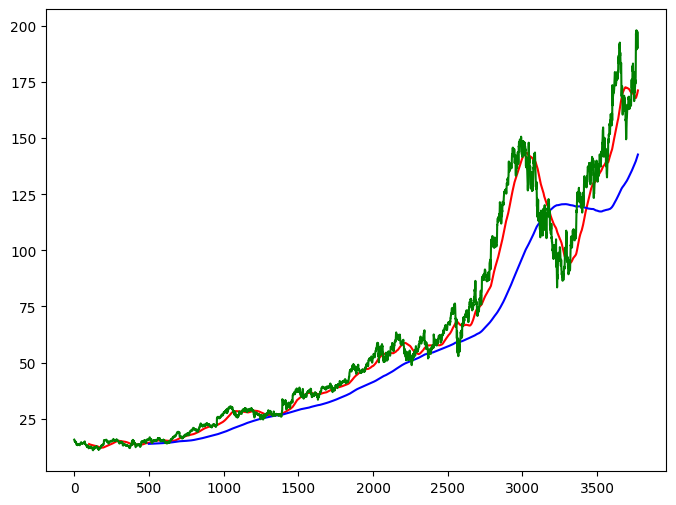

In [12]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(ma_500_days,'b')
plt.plot(data.Close,'g')
plt.show

In [13]:
data.dropna(inplace=True)

In [16]:
data_train = pd.DataFrame(data.Close[0 :int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80):len(data)])

In [17]:
data_train.shape[0],data_test.shape[0]

(3019, 755)

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

data_train_scale = scaler.fit_transform(data_train)

In [19]:
x = []
y = []
for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

In [21]:
x,y =np.array(x),np.array(y)

In [20]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [27]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))  # Last LSTM should not have return_sequences=True
model.add(Dropout(0.5))

model.add(Dense(units=1))  # Output layer

In [29]:
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(x, y, epochs=50, batch_size=32, verbose=1)


Epoch 1/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 10s 73ms/step - loss: 0.0351
Epoch 2/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 7s 79ms/step - loss: 0.0039
Epoch 3/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 7s 77ms/step - loss: 0.0034
Epoch 4/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 7s 77ms/step - loss: 0.0027
Epoch 5/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 7s 79ms/step - loss: 0.0023
Epoch 6/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 8s 85ms/step - loss: 0.0023
Epoch 7/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 8s 83ms/step - loss: 0.0025
Epoch 8/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 8s 84ms/step - loss: 0.0022
Epoch 9/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 8s 84ms/step - loss: 0.0027
Epoch 10/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 8s 82ms/step - loss: 0.0024
Epoch 11/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 7s 79ms/step - loss: 0.0027
Epoch 12/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 7s 80ms/step - loss: 0.0020
Epoch 13/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 8s 82ms/step - loss: 0.0017
Epoch 14/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 8s 83ms/step - loss: 0.0021
Epoch 15/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 8s 82ms/step - loss: 0.0018
Epo

In [30]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_5 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [48]:
past_500_days = data_train.tail(500)


In [49]:
data_test=pd.concat([past_500_days,data_test],ignore_index=True)

In [50]:
data_test_scale = scaler.fit_transform(data_test)

In [53]:

x = []
y = []

# Use data_test_scale.shape[0] instead of data_train_scale.shape[0]
for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i - 100:i])  # Extract sequences
    y.append(data_test_scale[i, 0])  # Target values

# Convert lists to NumPy arrays
x = np.array(x)
y = np.array(y)

print(f"x shape: {x.shape}, y shape: {y.shape}")

x shape: (1755, 100, 1), y shape: (1755,)


In [54]:
y_predict= model.predict(x)

55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step


In [56]:
1/scaler.scale_

array([145.32900238])

In [59]:
y_predict = scaler.inverse_transform(y_predict.reshape(-1, 1))


In [62]:
y = scaler.inverse_transform(y.reshape(-1, 1))


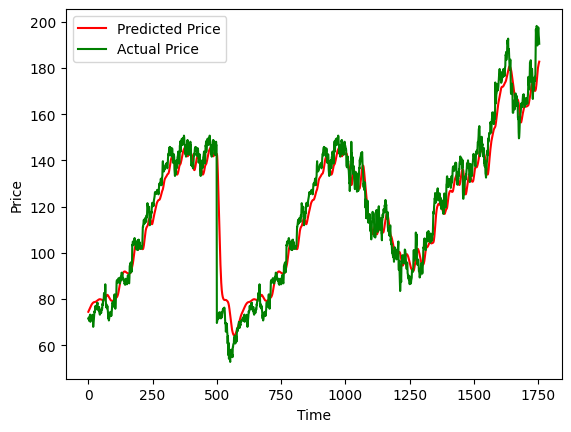

In [63]:
plt.plot(figsize=(10,8))
plt.plot(y_predict,'r',label='Predicted Price')
plt.plot(y,'g',label='Actual Price')
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()


In [64]:
model.save('Stock Prediction Model.keras')